In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [20]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [21]:
print(df.isnull().sum()) # If sum is 0, then no null entries
print("\n",df['label'].unique())
print("\n",df['label'].value_counts())

label      0
message    0
length     0
punct      0
dtype: int64

 ['ham' 'spam']

 ham     4825
spam     747
Name: label, dtype: int64


### Exploratory Data Analysis

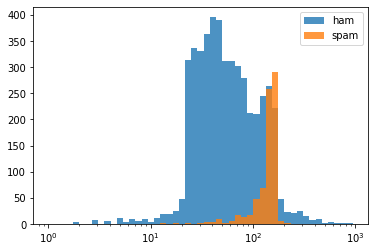

In [26]:
# Length of Ham and Spam Messages

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

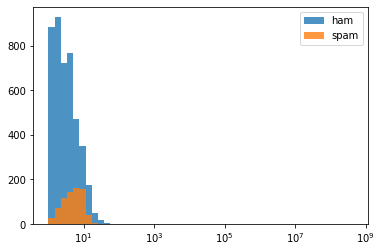

In [28]:
# Punctuation of Ham and Spam Messages

plt.xscale('log')
bins = 1.5**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

### Basic Model

In [29]:
from sklearn.model_selection import train_test_split

X = df[['length','punct']]
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3900, 2)
(1672, 2)
(3900,)
(1672,)


In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report
predictions = lr_model.predict(X_test)

print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[1404   44]
 [ 219    5]]
0.8427033492822966
              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [40]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,Y_train)
predictions = nb_model.predict(X_test)

print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[1438   10]
 [ 224    0]]
              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672

